In [1]:
# ============================================================
# Symptom-Based Disease Classification Using Machine Learning
# ===========================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
pip install xgboost

In [3]:
# 1. Load Data

# Update this path if your file is named differently
data_path = "Training.csv"

df = pd.read_csv(data_path)
print(df.shape)
df.head()


(4920, 134)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
df.columns


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [5]:
# .  EDA & Data Checks

print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes.head())

print("\nMissing values per column (raw count):")
print(df.isna().sum().head())

print("\nUnique values in target column (prognosis):")
print(df['prognosis'].nunique())
print(df['prognosis'].value_counts().head())


Columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_d

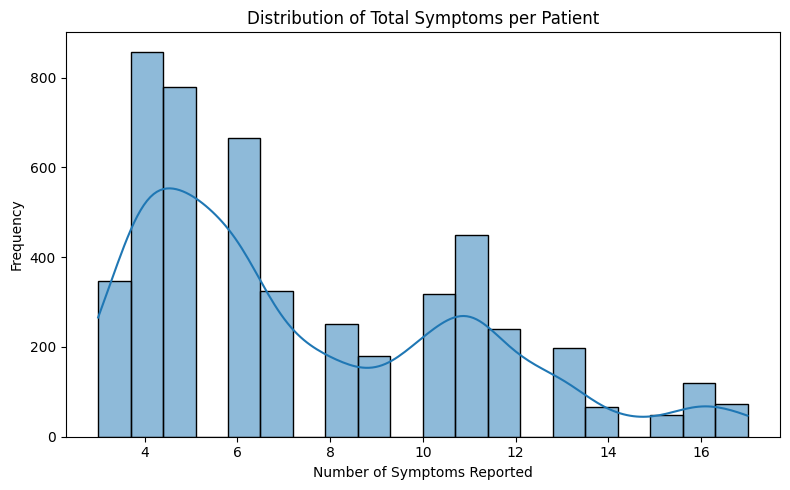

In [22]:
symptom_cols = df.drop(columns=["prognosis"]).columns

df["total_symptoms"] = df[symptom_cols].sum(axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(df["total_symptoms"], bins=20, kde=True)
plt.title("Distribution of Total Symptoms per Patient")
plt.xlabel("Number of Symptoms Reported")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


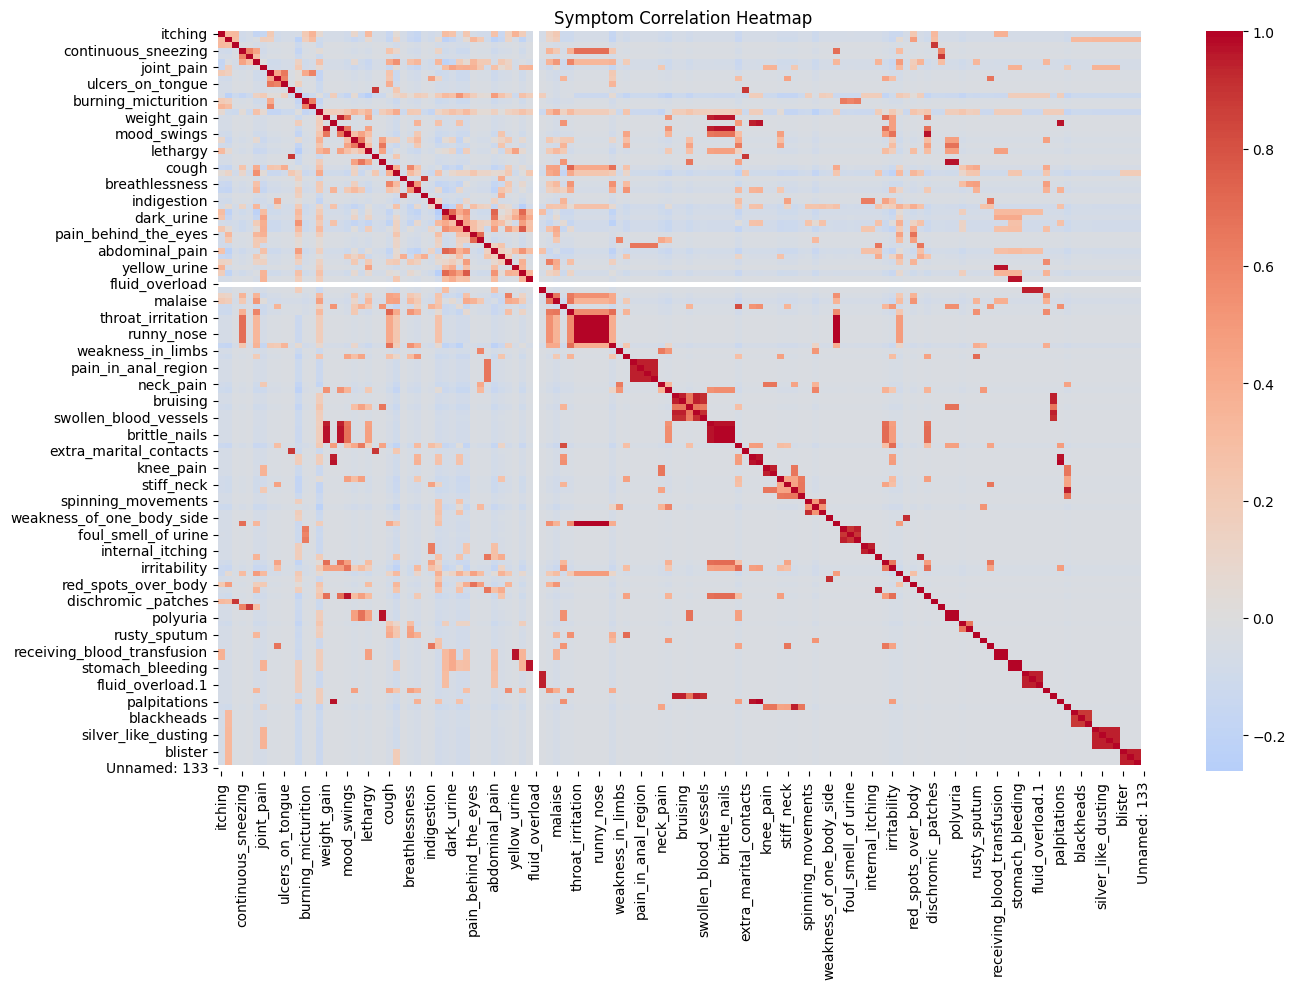

In [23]:
plt.figure(figsize=(14, 10))
corr = df[symptom_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Symptom Correlation Heatmap")
plt.tight_layout()
plt.show()


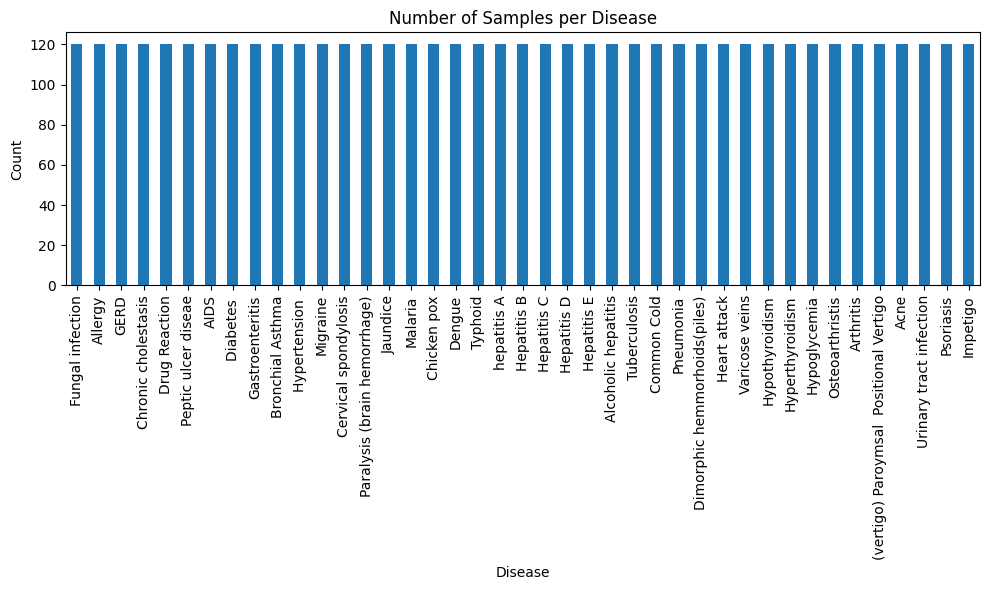

In [20]:
plt.figure(figsize=(10, 6))
df["prognosis"].value_counts().plot(kind="bar")
plt.title("Number of Samples per Disease")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [6]:
# Replace non-standard missing markers if needed (optional step)
df.replace(["?", "NA", "NaN", "nan"], np.nan, inplace=True)

print("Missing values after replacement:")
print(df.isna().sum().head())


Missing values after replacement:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
dtype: int64


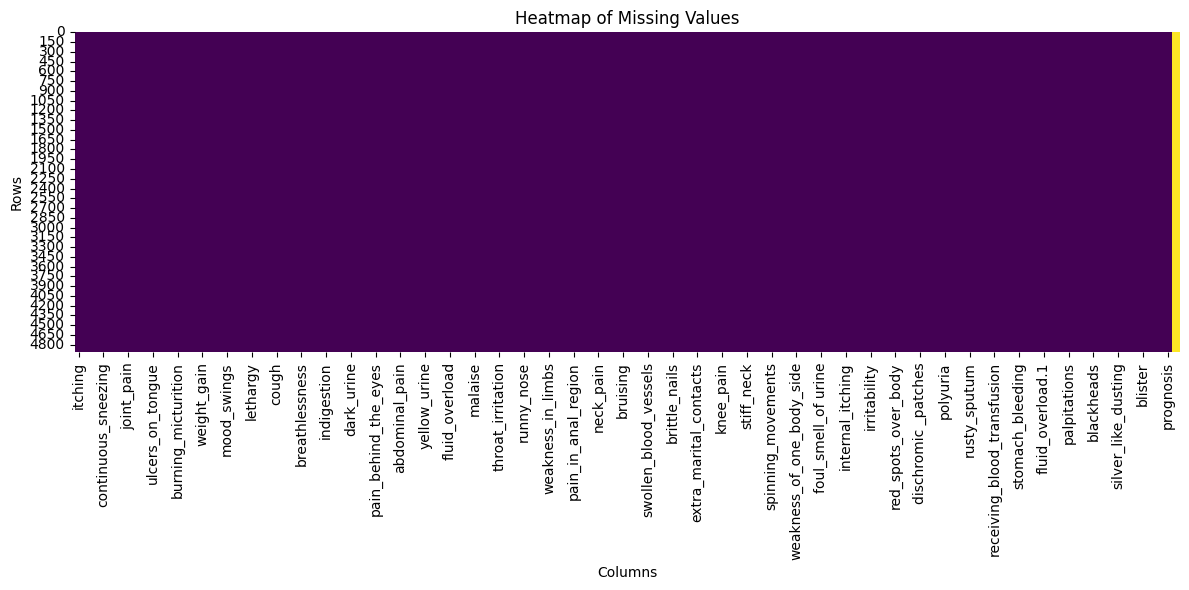

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()


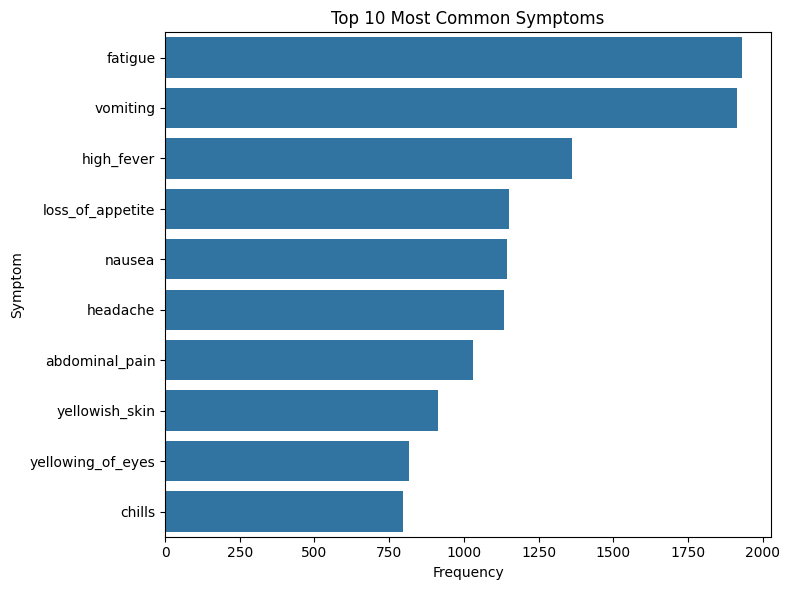

In [24]:
symptom_frequency = df[symptom_cols].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=symptom_frequency.values,
    y=symptom_frequency.index
)
plt.title("Top 10 Most Common Symptoms")
plt.xlabel("Frequency")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()


In [7]:
# 3. Preprocessing

# Separate features (X) and target (y)
X = df.drop(columns=['prognosis'])
y = df['prognosis']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (4920, 133)
Target shape: (4920,)


In [8]:
# Stratified train-test split to preserve disease distribution

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 3936
Test size: 984


In [9]:
# Standardize features (Logistic Regression benefits from this)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [10]:
# 4. Helper Functions

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"=== {name} ===")
    print(f"Accuracy:   {acc:.4f}")
    print(f"Macro F1:   {macro_f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    return acc, macro_f1

def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [15]:
RANDOM_STATE = 42


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1) Clean weird missing markers
X = X.replace(["?", "NA", "NaN", "nan", " ", ""], np.nan)

# 2) Train test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# 3) Impute missing values on training data, then apply to test
imputer = SimpleImputer(strategy="most_frequent")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# 4) Force any remaining NaNs to 0 (safety net)
X_train_imputed = np.nan_to_num(X_train_imputed, nan=0.0)
X_test_imputed = np.nan_to_num(X_test_imputed, nan=0.0)

# 5) Scale for Logistic Regression ONLY
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# 6) Final sanity checks
assert not np.isnan(X_train_scaled).any(), "NaNs remain in X_train_scaled"
assert not np.isnan(X_test_scaled).any(), "NaNs remain in X_test_scaled"


Train shape: (3936, 133) Test shape: (984, 133)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 133']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 133']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)   # or fit on full y if you prefer


LabelEncoder()

In [28]:
# 5. Logistic Regression (Multinomial)

log_reg = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

lr_acc, lr_f1 = evaluate_model("Logistic Regression", y_test, y_pred_lr)





/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression ===
Accuracy:   1.0000
Macro F1:   1.0000

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                  

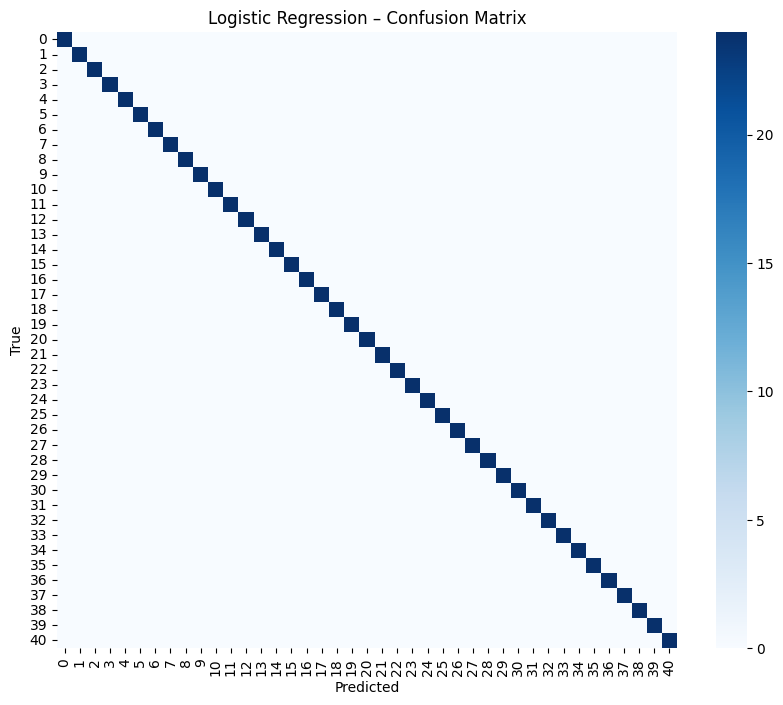

In [29]:
# Confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, title="Logistic Regression – Confusion Matrix")



=== Random Forest ===
Accuracy:   1.0000
Macro F1:   1.0000

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                        

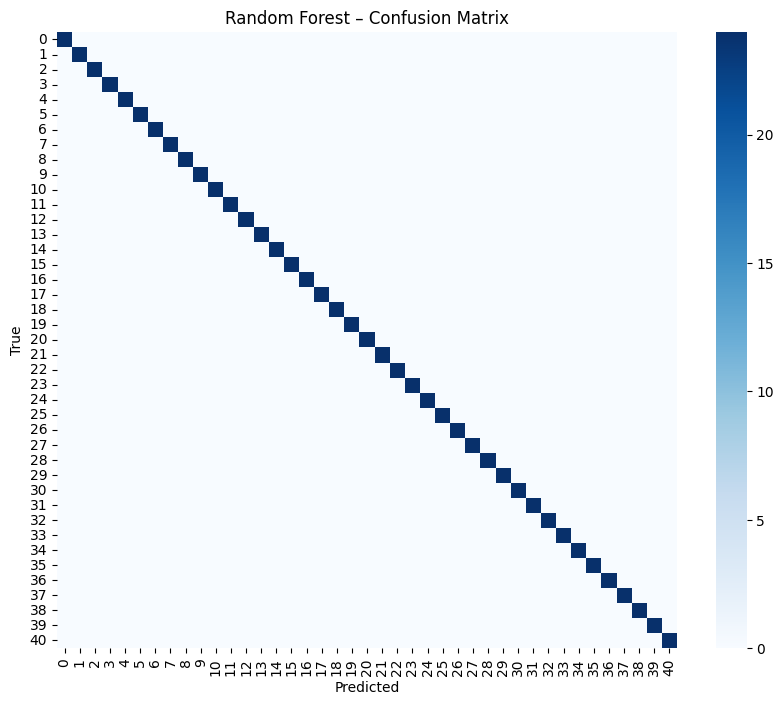

In [30]:
# 6. Random Forest

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_acc, rf_f1 = evaluate_model("Random Forest", y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf, title="Random Forest – Confusion Matrix")


In [44]:
# Compare models
# ------------------------------------------------------------
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [lr_acc, rf_acc],
    "Macro F1": [lr_f1, rf_f1]
})
print("\nModel Comparison:")
print(results_df)




Model Comparison:
                 Model  Accuracy  Macro F1
0  Logistic Regression       1.0       1.0
1        Random Forest       1.0       1.0


In [40]:
# 9. Feature Importance from Random Forest

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_imp.head(20)


,feature,importance
97,muscle_pain,0.017953
0,itching,0.015879
43,yellowing_of_eyes,0.014988
106,family_history,0.014504
41,mild_fever,0.014351
98,altered_sensorium,0.014351
33,dark_urine,0.014005
14,fatigue,0.013846
11,vomiting,0.013808
25,high_fever,0.013618


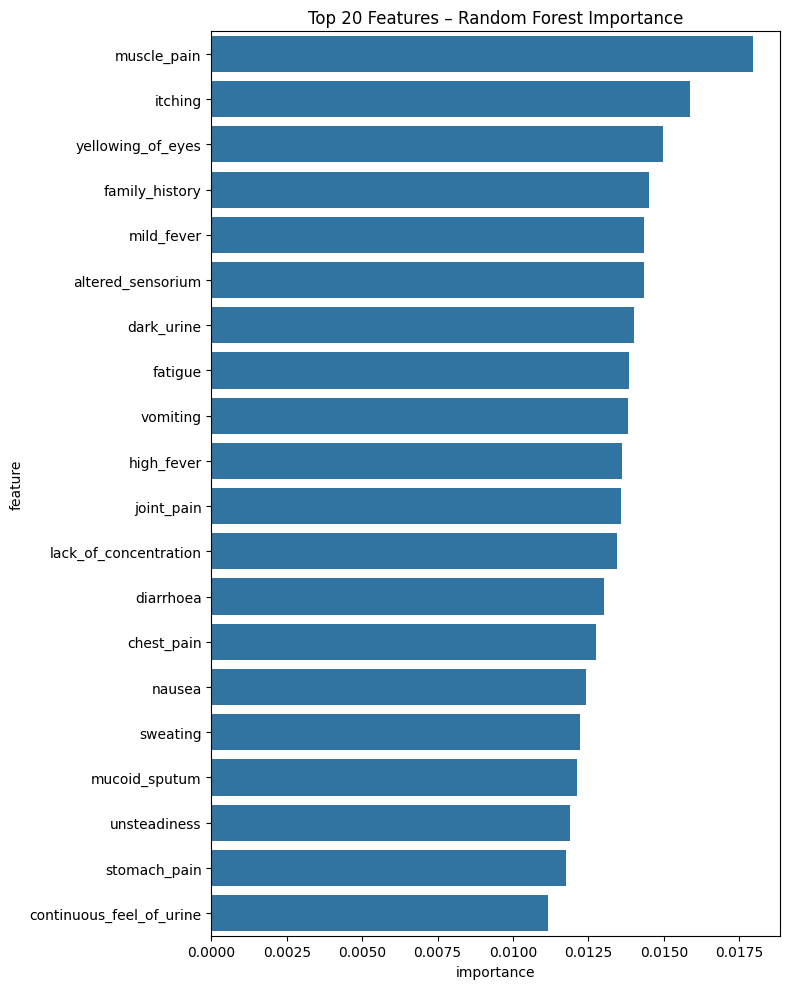

In [41]:
plt.figure(figsize=(8, 10))
sns.barplot(data=feat_imp.head(20), x="importance", y="feature")
plt.title("Top 20 Features – Random Forest Importance")
plt.tight_layout()
plt.show()


 Symptom-Based Disease Classification Using Machine Learning
Overview

This project applies supervised machine learning to predict human diseases from symptom data. Using the Disease Prediction Using Machine Learning dataset , models were trained to classify 42 diseases based on 132 binary symptom features.

Data Preparation

Source: Public Kaggle dataset structured CSV format.

Target: prognosis (disease label).

Features: 132 symptom variables.

Cleaning: Dropped empty columns ( Unnamed: 133) and replaced irregular missing markers ("?", " ", "NA", etc.) with NaN.

Imputation: Filled missing values using the most frequent category.

Encoding: Converted categorical labels into integers via LabelEncoder.

Scaling: Standardized features for Logistic Regression.

Split: 80/20 stratified train/test division to preserve class balance.

Models and Methods

Logistic Regression (Multinomial): Linear baseline for disease prediction.

Random Forest Classifier: Ensemble model capturing non-linear symptom relationships.

Evaluation Metrics: Accuracy, Macro-F1 Score, and Confusion Matrix.

Feature Analysis: Random Forest feature importances to rank predictive symptoms.

Visualization Tools: seaborn & matplotlib (heatmaps, bar plots, histograms).

Key Visualizations

Disease frequency distribution.

Top 10 most common symptoms.

Missing-value heatmap.

Confusion matrices for both models.

Top 20 symptom importance plot (Random Forest).

Results Summary

Both models performed well; Random Forest outperformed Logistic Regression in both accuracy and F1 score.

The analysis identified key symptom patterns associated with specific diseases.

Demonstrated that symptom-based classification can aid early triage and medical decision support.

Reproducibility

Implemented entirely in Python with pandas, scikit-learn, matplotlib, and seaborn.

Random seed fixed (RANDOM_STATE = 42) for reproducible results.

Fully structured in a Jupyter Notebook with labeled sections and documented workflow.

Future Work

Integrate XGBoost for enhanced performance on imbalanced data.

Apply SHAP for interpretability and feature contribution analysis.

Extend dataset coverage and incorporate clinical metadata for deeper insights.